# Task 1:  Simple NN with Keras

**T1.1** In this task you should implement Neural Network Model (classification task) as described in this [tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/). This will give you a gentle introduction to the Keras library. Refer to Keras [documentation](https://keras.io/models/model/) to learn more and better understand the code.

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
from numpy import loadtxt

Using TensorFlow backend.


In [4]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
print(X.shape)

(768, 8)


In [5]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [8]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 66us/step
Accuracy: 76.56


***
**T1.2** Method **fit** from the Model API returns a History object ([read more in the documentation](https://keras.io/visualization/)), which keeps records of training loss values and metrics values at each epoch. 

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


You can use the returned object to visualize how your model trains over epochs:  

In [11]:
import matplotlib.pyplot as plt

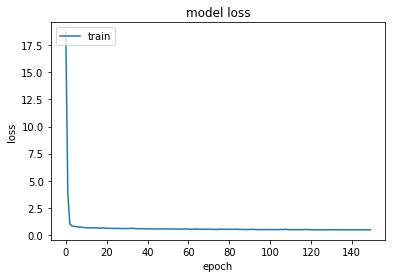

In [12]:
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In the fit method you can also specify a fraction of the training data to be used for validation. The validation data will not be used for training the model, it will be used to evaluate the loss and any model metric at the end of each epoch. See the example below. You can also pass validation data as an argument of the fit method. Please refer to the documentation for more details.

In order to get rid of the randomness in your code you need to set the Numpy seed and Tensorflow seed. This can be done as follows.

In [13]:
from numpy.random import seed
from tensorflow import set_random_seed

In [14]:
seed(0)
set_random_seed(0)

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=150, batch_size=10, validation_split = 0.1, verbose = 0)

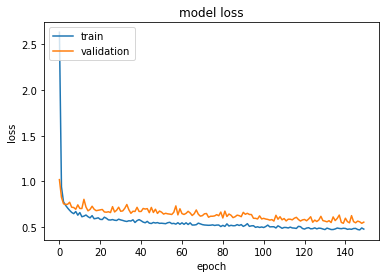

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Task 2

In this task you should change the code so that the model is evaluated with 5 cross validation using KFold as in previous practicals. Report the final accuracy (mean accuracy obtain on testing dataset across all the folds).

In [19]:
# define the keras model
def getModel1():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# cross validation
from sklearn.model_selection import KFold
import statistics
kf = KFold(n_splits=5)
acc = []
for train, test in kf.split(X):
    model = getModel1()
    model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)
    _,accuracy = model.evaluate(X[test], y[test])
    acc.append(accuracy)
mean_acc = sum(acc)/len(acc)
print('Mean accuracy: ',mean_acc)

153/153 [==============================] - 0s 710us/step
Mean accuracy:  0.6863254427909851


***
**Calculating F1:** Keras does not have builded in the F1 metric. However, we can use sklearn.metrics to calculate it. In order to do this, you have to obtain the predictions of you NN calling method predict. You will have to convert the predictions into class labels. You can either use np.wehere for binary classification, or np.argmax for multi-class classification problem. Finally, you can use [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) to calculate the F1 for the predictions of your model. 

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

kf = KFold(n_splits=5)
f1 = []
for train, test in kf.split(X):
    model = getModel1()
    model.fit(X[train], y[train], epochs=150, batch_size=10, verbose=0)
    predictions = model.predict(X[test])
    y_pred = np.where(predictions>0.5,1,0)
    f1.append(f1_score(y[test], y_pred , average="macro"))
print('Macro F1: ',sum(f1)/len(f1))

Macro F1:  0.6683028878085537


# Task 3

Modify the NN model to see how this affect its performance. Here are some modifications, which could be done:

- Change the batch size to be 10% of the train set size
- Increase number of epochs
- Try different [activation functions](https://keras.io/activations/)
- Change number of neurons in the output and hidden layers
- Add additional hidden layers
- Try different [parameters initializers](https://keras.io/initializers/) 

What is the best accuracy you can get? Can you observe some interesting patterns? 

In [35]:
# define the keras model
def getModel2():
    seed(0)
    set_random_seed(0)
    model = Sequential()
    model.add(Dense(20, input_dim=8, kernel_initializer='random_uniform',activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dense(15, kernel_initializer='random_uniform',activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dense(10, activation=keras.layers.LeakyReLU(alpha=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
# cross validation
from sklearn.model_selection import KFold
import statistics

kf = KFold(n_splits=5)
acc = []
for train, test in kf.split(X):
    model = getModel2()
    model.fit(X[train], y[train], epochs=150, batch_size=int(0.1*len(train)), verbose=0)
    _, accuracy = model.evaluate(X[test], y[test])
    acc.append(accuracy)
mean_acc = sum(acc)/len(acc)
print('Mean accuracy: ',mean_acc)
7526525855

153/153 [==============================] - 0s 2ms/step
Mean accuracy:  0.7383668661117554


7526525855

# Task 4

Re-implement the code so that it can be applied to solve a regression problem. Use Boston Housing dataset, which can be obtained from sklearn.datasets. Construct a NN model with architecture of your choice and evaluate it using cross validation.

In [48]:
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

In [51]:
def getModel3():
    model = Sequential()
    model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
    return model

In [53]:
seed(0)
set_random_seed(0)

kf = KFold(n_splits=5)
mse = []
mae = []

for train, test in kf.split(X):
    model = getModel3()
    model.fit(X[train], y[train], epochs=300, batch_size=int(0.1*len(train)), verbose=0)
    _,e1,e2 = model.evaluate(X[test], y[test])
    mse.append(e1)
    mae.append(e2)
#mean_acc = sum(acc)/len(acc)
print('MSE: ',sum(mse)/len(mse))
print('MAE: ',sum(mae)/len(mae))

101/101 [==============================] - 1s 12ms/step
MSE:  70.93842374616122
MAE:  5.953202302181427
